In [2]:
'''
    Code taken from Warren Alphonso's Website discussing the
    VQE implementation of the FermiHubbard model
    https://warrenalphonso.github.io/qc/hubbard#VQE
'''

from openfermion.hamiltonians import FermiHubbardModel
from openfermion.utils import SpinPairs
from openfermion.utils import HubbardSquareLattice
from openfermioncirq import SwapNetworkTrotterAnsatz

#==== Create 2x2 Hubbard Square Lattice ========
# HubbardSquareLattice parameters
x_n = 2
y_n = 2
n_dofs = 1 # 1 degree of freedom for spin 
periodic = 0 # Don't want tunneling terms to loop back around 
spinless = 0 # Has spin

lattice = HubbardSquareLattice(x_n, y_n, n_dofs=n_dofs, periodic=periodic, spinless=spinless)


#====== Create FermiHubbardModel Instance from Defined Lattice =========
tunneling = [('neighbor', (0, 0), 1.)] 
interaction = [('onsite', (0, 0), 2., SpinPairs.DIFF)] 
potential = [(0, 1.)] # Must be U/2 for half-filling
mag_field = 0. 
particle_hole_sym = False

hubbard = FermiHubbardModel(lattice , tunneling_parameters=tunneling, interaction_parameters=interaction, 
                            potential_parameters=potential, magnetic_field=mag_field, 
                            particle_hole_symmetry=particle_hole_sym)

#print(hubbard.hamiltonian())

ModuleNotFoundError: No module named 'openfermion.ops._givens_rotations'

Text(0.5, 0, 's')

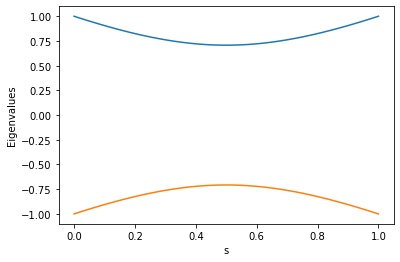

In [23]:
#Example Adiabatic Evolution for 2x2 Hamiltonian
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

H_A = np.array( [[1, 0], [0, -1]] )
H_B = np.array( [[0, 1], [1, 0]] ) 
H = lambda s: (1-s)*H_A + s*H_B
psi_A = np.array([0, 1]) # The ground state of H_A 

# If n=5, then we do 5 steps: H(0), H(0.25), H(0.5), H(0.75), H(1)
n = 50
t = 1
res = psi_A
s_vals = []
up_eigs = []
dwn_eigs = []
for i in range(n): 
    s = i / (n-1)
    s_vals.append(s)
    res = np.dot(sp.expm(-1j * H(s) * t), res)
    up_eigs.append(sp.eig(H(s))[0][0])
    dwn_eigs.append((sp.eig(H(s))[0][1]))
    

plt.plot(s_vals, up_eigs)
plt.plot(s_vals, dwn_eigs)
plt.ylabel('Eigenvalues')
plt.xlabel('s')

In [1]:

import sys
sys.path.append('./src')
import CustomSwapNetworkTrotterAnsatz
#from openfermioncirq import SwapNetworkTrotterAnsatz
#from CustomSwapNetworkTrotterAnsatz import *
steps = 2
#ansatz = CustomSwapNetworkTrotterAnsatz(hubbard, iterations=steps)

ModuleNotFoundError: No module named 'openfermion.ops._givens_rotations'